In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 88% 139M/158M [00:01<00:00, 109MB/s]
100% 158M/158M [00:01<00:00, 87.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [44]:
conv_base.trainable = False

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,146,883 (88.30 MB)

 Trainable params: 8,432,195 (32.17 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [46]:
batch_size = 4

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Covid19-dataset/train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/Covid19-dataset/test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [47]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
history = model.fit(train_generator, epochs=9, validation_data= validation_generator)

Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.5720 - loss: 1.2220 - val_accuracy: 0.6970 - val_loss: 0.4803
Epoch 2/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.8118 - loss: 0.5457 - val_accuracy: 0.7576 - val_loss: 0.5773
Epoch 3/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.7955 - loss: 0.5576 - val_accuracy: 0.7121 - val_loss: 0.6323
Epoch 4/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8004 - loss: 0.4549 - val_accuracy: 0.8636 - val_loss: 0.3373
Epoch 5/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.8363 - loss: 0.3886 - val_accuracy: 0.8939 - val_loss: 0.2418
Epoch 6/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.9400 - loss: 0.1763 - val_accuracy: 0.8788 - val_loss: 0.3954
Epoch 7/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.8310 - loss: 0.4655 - val_accuracy: 0.9242 - val_loss: 0.1681
Epoch 8/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9138 - loss: 0.2173 - val_accuracy: 0.7273 - val_

In [49]:
import matplotlib.pyplot as plt

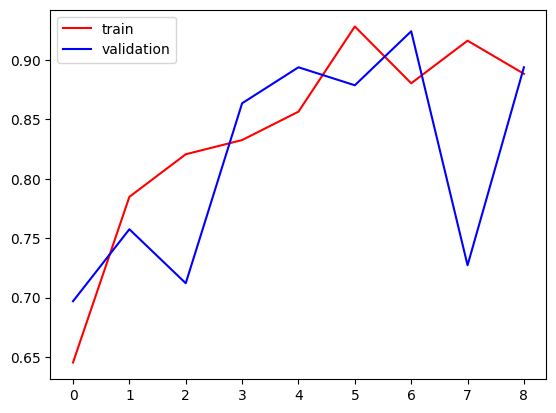

In [50]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [51]:
import cv2
import numpy as np

In [52]:
class_map = dict([value, key] for key, value in train_generator.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [53]:
test_img = cv2.imread('/content/covid chest.webp')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


'Viral Pneumonia'

In [54]:
test_img1 = cv2.imread('/content/normal chest.jpg')
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input1))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'Normal'

In [55]:
test_img2 = cv2.imread('/content/pneumonia chest.jfif')
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input2))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'Normal'

In [56]:
test_img3 = cv2.imread('/content/pneu 1.jfif')
test_img3 = cv2.resize(test_img3,(256,256))
test_input3 = test_img3.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input3))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'Normal'

In [57]:
test_img4 = cv2.imread('/content/pneu 2.jfif')
test_img4 = cv2.resize(test_img4,(256,256))
test_input4 = test_img4.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input4))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'Viral Pneumonia'

In [58]:
test_img5 = cv2.imread('/content/pneu 2.jfif')
test_img5 = cv2.resize(test_img5,(256,256))
test_input5 = test_img5.reshape((1,256,256,3))
predicted_class = np.argmax(model.predict(test_input5))
predicted_img = class_map[predicted_class]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'Viral Pneumonia'